In [1]:
import os 
data_list = os.listdir("C:/Users/HP/DL_Project/Cat_and_Dog_Dataset/training_set")
print(data_list)

['cats', 'dogs']


In [2]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, load_model,Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2,preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions,VGG16,preprocess_input
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import tensorflow as tf

In [3]:
train_datasets ="C:/Users/HP/DL_Project/Cat_and_Dog_Dataset/training_set/"
test_datasets = "C:/Users/HP/DL_Project/Cat_and_Dog_Dataset/test_set/"

In [4]:
image_size =(150,150)
number_class = len(data_list)
batch_size = 10
number_epochs =  10
learningRate = 0.001

In [5]:
train_dataset_generator = ImageDataGenerator(rescale=1./255,
                                            rotation_range=45,
                                            height_shift_range=0.2,
                                            width_shift_range=0.2,
                                            shear_range=0.2,
                                            zoom_range=0.2,
                                            channel_shift_range=20,
                                            horizontal_flip=True,
                                            vertical_flip=True,
                                            validation_split=0.2,
                                            fill_mode="constant",
                                            featurewise_std_normalization=True,
                                            featurewise_center=True)
                                           

In [6]:
train_batches = train_dataset_generator.flow_from_directory(train_datasets,
                                                           target_size=image_size,
                                                           shuffle=True,
                                                           batch_size=batch_size,
                                                           subset='training',
                                                           seed=42,
                                                           class_mode ="binary")

Found 121 images belonging to 2 classes.


In [7]:
validation_batches = train_dataset_generator.flow_from_directory(train_datasets,
                                                           target_size=image_size,
                                                           shuffle=True,
                                                           batch_size=batch_size,
                                                           subset='validation',
                                                           seed=42,
                                                           class_mode ="binary")

Found 30 images belonging to 2 classes.


In [8]:
vgg_model=VGG16(weights = "imagenet",
               include_top = False,
               input_shape=(150,150,3))
vgg_model.trainable = False

In [9]:
model = Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [10]:
model.compile(loss='binary_crossentropy',
             optimizer = Adam(learning_rate = learningRate),
             metrics = ['accuracy'])

In [11]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________
None


In [12]:
print(len(train_batches))
print()
print(len(validation_batches))

13

3


In [13]:
print(train_batches.n)
print()
print(validation_batches.n)

121

30


In [14]:
train_step_size = train_batches.n //train_batches.batch_size
validation_step_size = validation_batches.n //validation_batches.batch_size

In [15]:
model_runing_history = model.fit(train_batches,
                                steps_per_epoch = train_step_size,
                                validation_data = validation_batches,
                                validation_steps = validation_step_size,
                                epochs = number_epochs)

Epoch 1/10


C:\Users\HP\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\HP\anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


12/12 [==============================] - 19s 2s/step - loss: 1.6304 - accuracy: 0.4414 - val_loss: 1.0636 - val_accuracy: 0.5333
Epoch 2/10
12/12 [==============================] - 18s 1s/step - loss: 0.8055 - accuracy: 0.5315 - val_loss: 0.7022 - val_accuracy: 0.5667
Epoch 3/10
12/12 [==============================] - 18s 2s/step - loss: 0.5966 - accuracy: 0.6757 - val_loss: 0.6120 - val_accuracy: 0.6333
Epoch 4/10
12/12 [==============================] - 18s 2s/step - loss: 0.5695 - accuracy: 0.7297 - val_loss: 0.5634 - val_accuracy: 0.6000
Epoch 5/10
12/12 [==============================] - 18s 1s/step - loss: 0.5295 - accuracy: 0.7748 - val_loss: 0.7217 - val_accuracy: 0.5667
Epoch 6/10
12/12 [==============================] - 19s 2s/step - loss: 0.5336 - accuracy: 0.7387 - val_loss: 0.5163 - val_accuracy: 0.6667
Epoch 7/10
12/12 [==============================] - 19s 2s/step - loss: 0.4589 - accuracy: 0.7838 - val_loss: 0.5307 - val_accuracy: 0.7333
Epoch 8/10
12/12 [=============

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

def accuracy_loss_plot(model_data, epochs):
    
    
    acc = model_runing_history.history['accuracy']
    loss = model_runing_history.history['loss']
    val_acc = model_runing_history.history['val_accuracy']
    val_loss = model_runing_history.history['val_loss']
    
    plt.figure(figsize = (20, 8))
    plt.subplot(121)
    plt.plot(range(1, epochs), acc[1:], label = 'Training Accuracy')
    plt.plot(range(1, epochs), val_acc[1:], label = 'Test Accuracy')
    plt.title("Accuracy Over " + str(epochs) + "Epochs", size = 15)
    plt.legend()
    plt.grid(True)
    
    
    
    plt.figure(figsize = (20, 8))
    plt.subplot(122)
    plt.plot(range(1, epochs), loss[1:], label = 'Training Loss')
    plt.plot(range(1, epochs), val_loss[1:], label = 'Test Loss')
    plt.title("Loss Over " + str(epochs) + "Epochs", size = 15)
    plt.legend()
    plt.grid(True)
    
    plt.show()

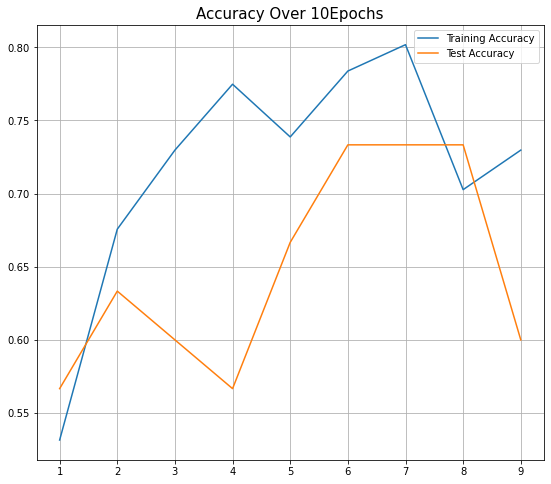

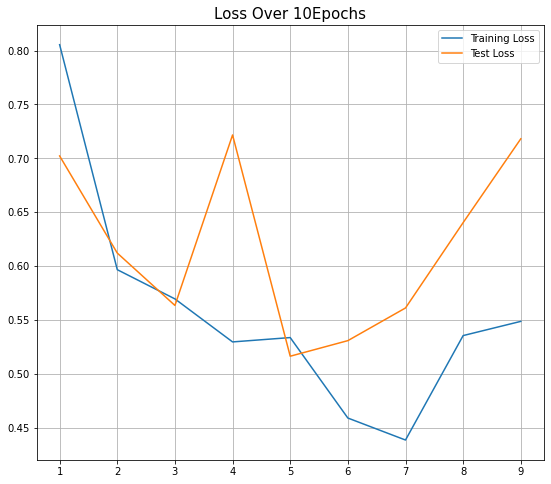

In [17]:
accuracy_loss_plot(model_runing_history,10)

In [18]:
model.save("cat.h5")

In [19]:
test_datagenrator = ImageDataGenerator(rescale=1./255)
test_batches = test_datagenrator.flow_from_directory(test_datasets,
                                                    target_size=image_size,
                                                    shuffle=False,
                                                    batch_size=1,
                                                    seed=42,
                                                    class_mode ="binary")
test_batches.reset()

Found 48 images belonging to 2 classes.


In [20]:
test_batches.reset()
random_data = model.evaluate(test_batches,
                            steps = int(np.ceil(len(test_batches)/batch_size)),
                             use_multiprocessing=False,
                             verbose=1,
                             workers=1)

5/5 [==============================] - 1s 173ms/step - loss: 1.4272 - accuracy: 0.2000


In [21]:
print("TestDatasets loss: ",random_data[0])
print("TestDatasets Accuracy: ",random_data[1])

TestDatasets loss:  1.4272266626358032
TestDatasets Accuracy:  0.20000000298023224


In [22]:
test_batches.reset()

In [23]:
predictted = model.predict(test_batches, 1000, verbose=1)

48/48 [==============================] - 8s 164ms/step


cats\cat.4001.jpg


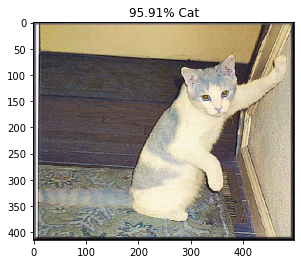

cats\cat.4002.jpg


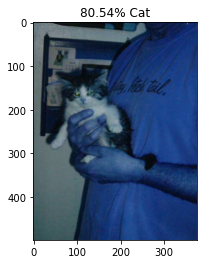

cats\cat.4003.jpg


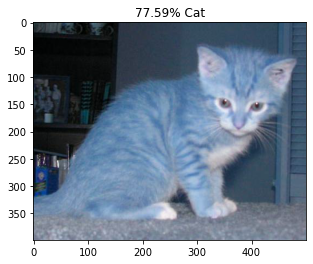

cats\cat.4004.jpg


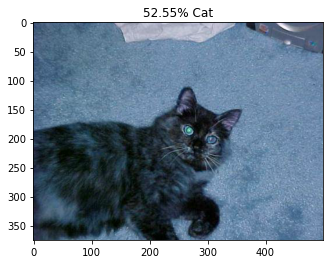

cats\cat.4005.jpg


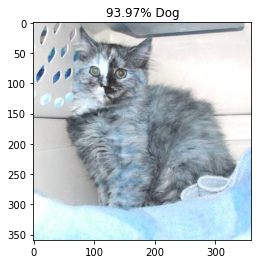

cats\cat.4006.jpg


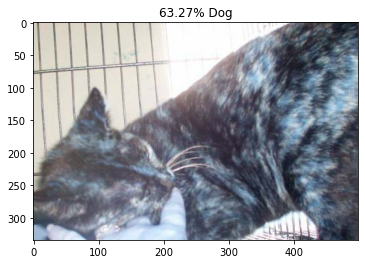

cats\cat.4007.jpg


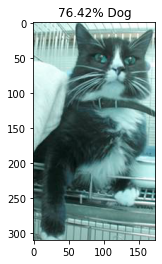

cats\cat.4008.jpg


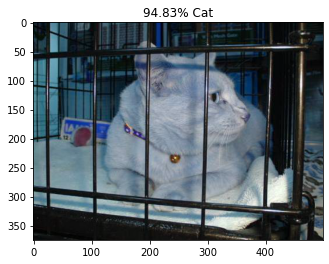

cats\cat.4009.jpg


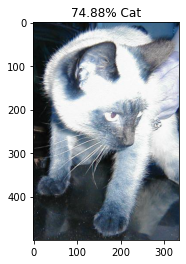

cats\cat.4010.jpg


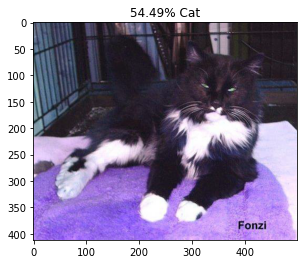

cats\cat.4011.jpg


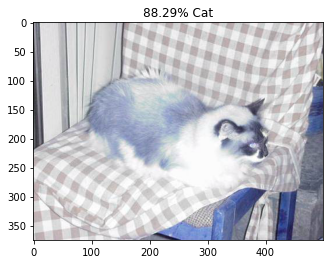

cats\cat.4012.jpg


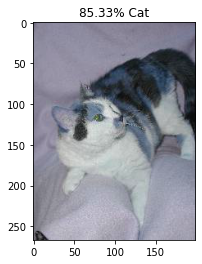

cats\cat.4013.jpg


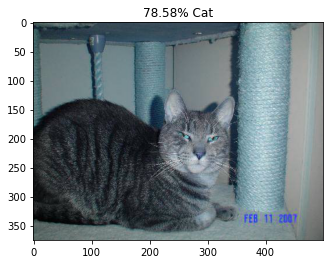

cats\cat.4014.jpg


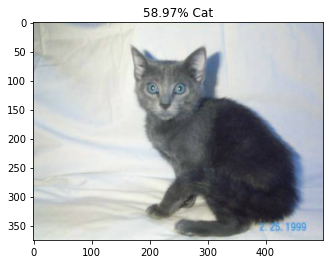

cats\cat.4015.jpg


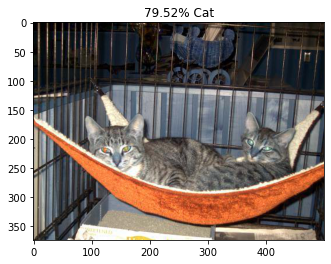

cats\cat.4016.jpg


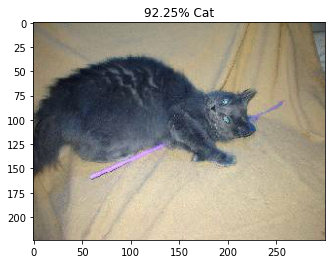

cats\cat.4017.jpg


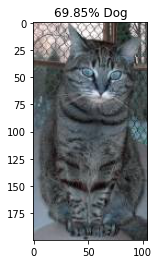

cats\cat.4018.jpg


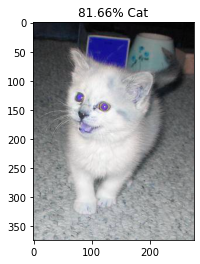

cats\cat.4019.jpg


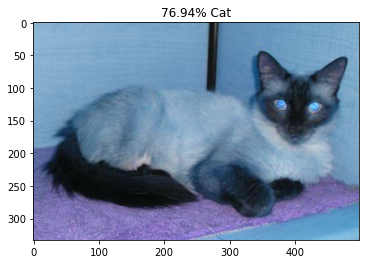

cats\cat.4020.jpg


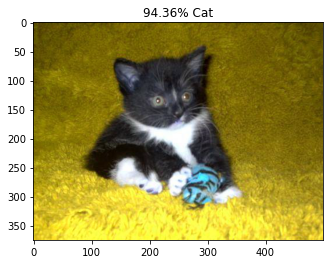

cats\cat.4021.jpg


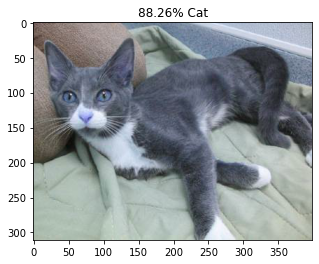

cats\cat.4022.jpg


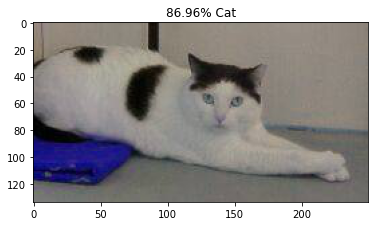

cats\cat.4023.jpg


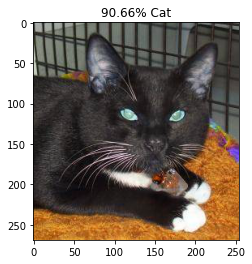

cats\cat.4024.jpg


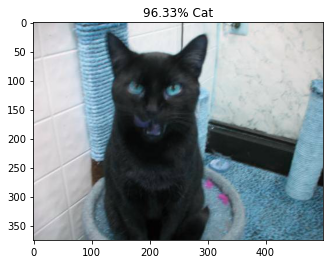

dogs\dog.4001.jpg


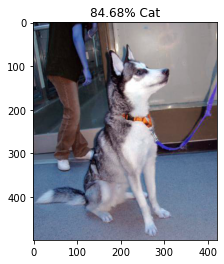

dogs\dog.4002.jpg


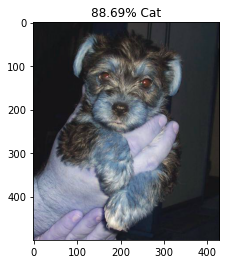

dogs\dog.4003.jpg


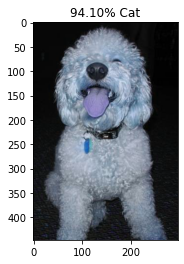

dogs\dog.4004.jpg


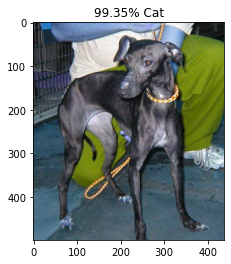

dogs\dog.4005.jpg


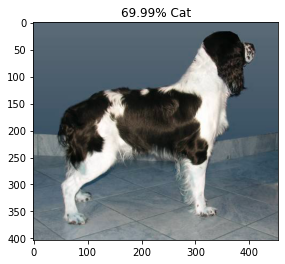

dogs\dog.4006.jpg


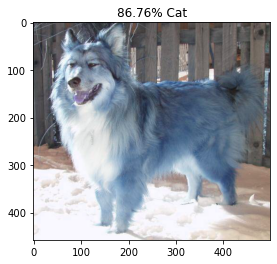

dogs\dog.4007.jpg


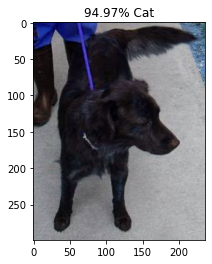

dogs\dog.4008.jpg


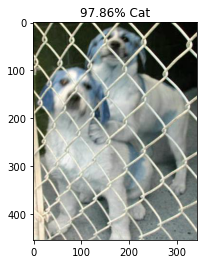

dogs\dog.4009.jpg


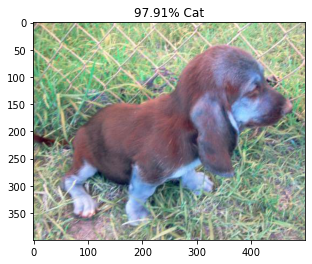

dogs\dog.4010.jpg


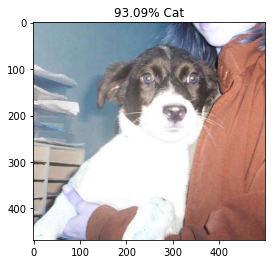

dogs\dog.4011.jpg


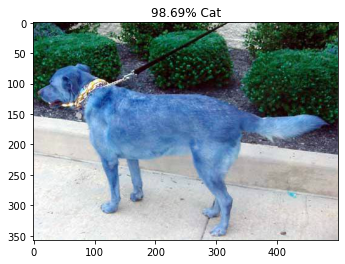

dogs\dog.4012.jpg


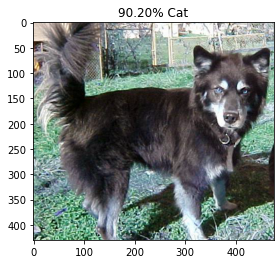

dogs\dog.4013.jpg


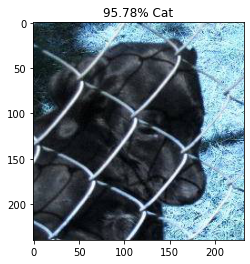

dogs\dog.4014.jpg


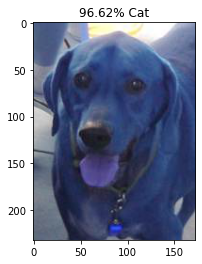

dogs\dog.4015.jpg


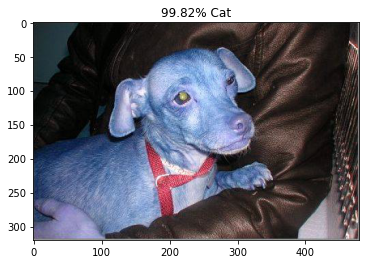

dogs\dog.4016.jpg


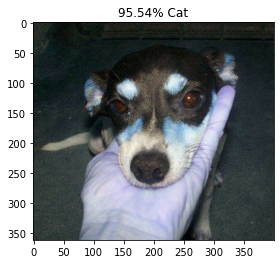

dogs\dog.4017.jpg


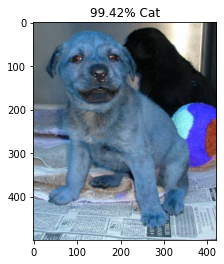

dogs\dog.4018.jpg


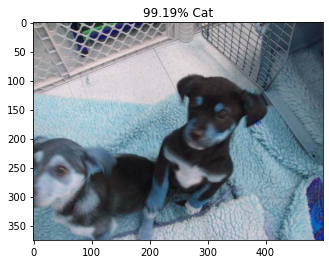

dogs\dog.4019.jpg


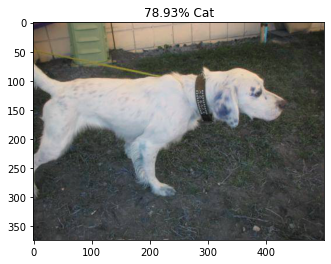

dogs\dog.4020.jpg


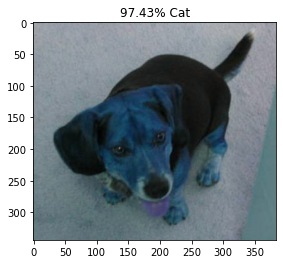

dogs\dog.4021.jpg


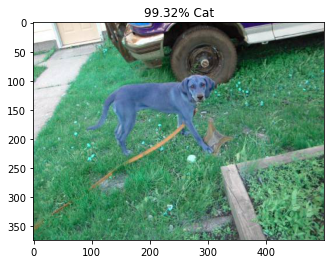

dogs\dog.4022.jpg


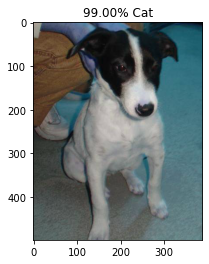

dogs\dog.4023.jpg


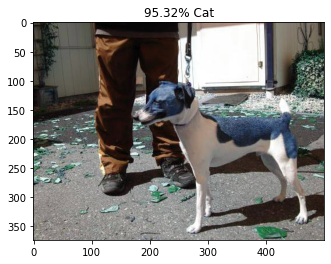

dogs\dog.4024.jpg


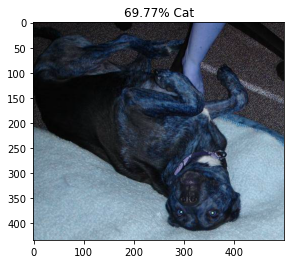

In [25]:
import cv2
import matplotlib.image as mat_image

for index, prob_value in enumerate(predictted):
    image_path = test_datasets + "/"+ test_batches.filenames[index]
    image = mat_image.imread(image_path)
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    pixel = np.array(image)
    plt.imshow(pixel)
    print(test_batches.filenames[index])
    
    if prob_value > 0.5:
        plt.title("%.2f" % (prob_value[0]*100) + "% Cat")
    else:
        plt.title("%.2f" % ((1 - prob_value[0])*100) + "% Dog")
        
    plt.show()